In [1]:
# Importing the packages

import numpy as np
import pandas as pd
import pandas_profiling 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
# loading the dataset

reviews = pd.read_csv(r'C:\Users\LuCky\Desktop\Python Projects\Python ML Models\Amazon Alexa Rating\amazon_alexa.tsv', sep = '\t')
reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
reviews.shape

(3150, 5)

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [6]:
# Creating profiling for the Data Set

profile = pandas_profiling.ProfileReport(reviews)

In [7]:
profile.to_file(outputfile="Amazon_reviews.html")

In [8]:
reviews.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
# Converting the Data column

reviews['date'] = pd.to_datetime(reviews['date'])

In [10]:
reviews['date'].dt.year.value_counts()

2018    3150
Name: date, dtype: int64

In [11]:
reviews['date'].min()

Timestamp('2018-05-16 00:00:00')

In [12]:
reviews['date'].max()

Timestamp('2018-07-31 00:00:00')

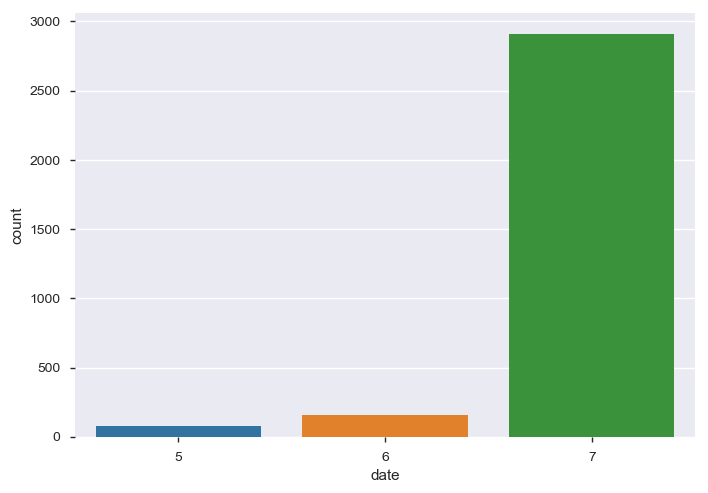

In [13]:
# Creating graphs for EDA
# Number of purchases in each month

sns.countplot(reviews['date'].dt.month)

In [14]:
reviews['date'].dt.month.value_counts()  #so many reviews in July month hence highest product sold in July

7    2913
6     155
5      82
Name: date, dtype: int64

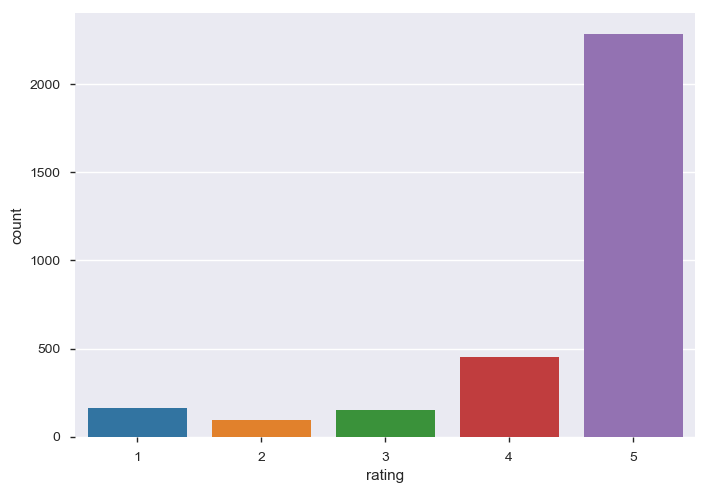

In [15]:
sns.countplot(x= 'rating', data = reviews)

In [16]:
reviews.rating.value_counts()   #lots of 5 star ratings

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

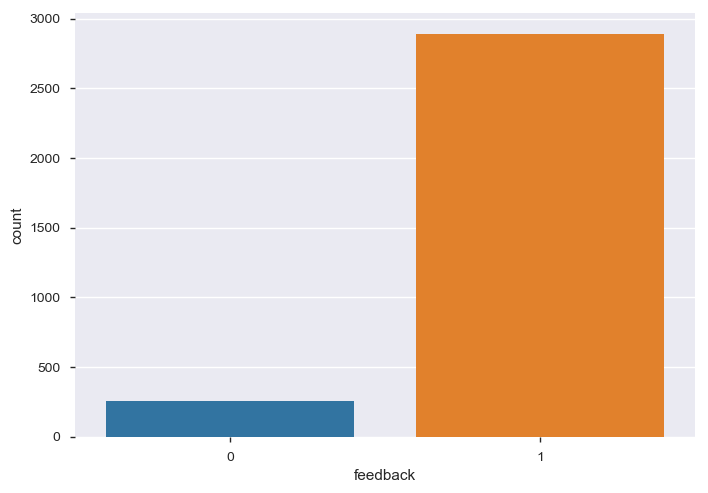

In [17]:
sns.countplot(x = 'feedback', data = reviews)    #1 is positive feedback and 0 is negative feedback

In [18]:
# word count in each review

reviews['length'] = reviews['verified_reviews'].apply(lambda x:len(x.split(" ")))
reviews.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,3
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,2
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,39
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,2018-07-31,Charcoal Fabric,Music,1,1


In [19]:
reviews.length.describe()     #maximum people has given less than 32 words reviews

count    3150.000000
mean       25.748254
std        35.101628
min         1.000000
25%         6.000000
50%        14.000000
75%        32.000000
max       526.000000
Name: length, dtype: float64

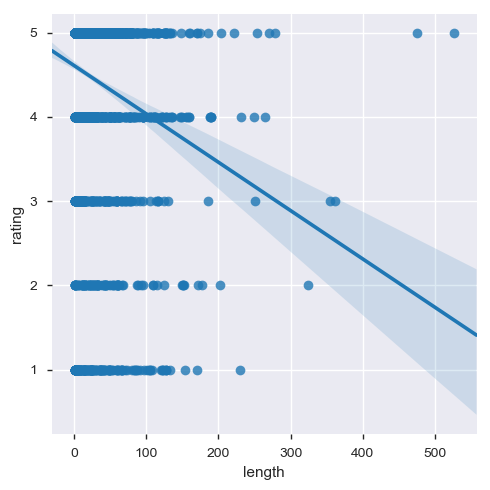

In [20]:
#relation between rating and length of review

sns.lmplot(x = 'length', y = 'rating', data = reviews)      #few words in negative feedbacks

In [21]:
# Analysis of negative feedbacks

nf = reviews[reviews['feedback'] == 0]

In [22]:
#Text Processing
#conda install -c conda-forge wordcloud 

from wordcloud import WordCloud, STOPWORDS

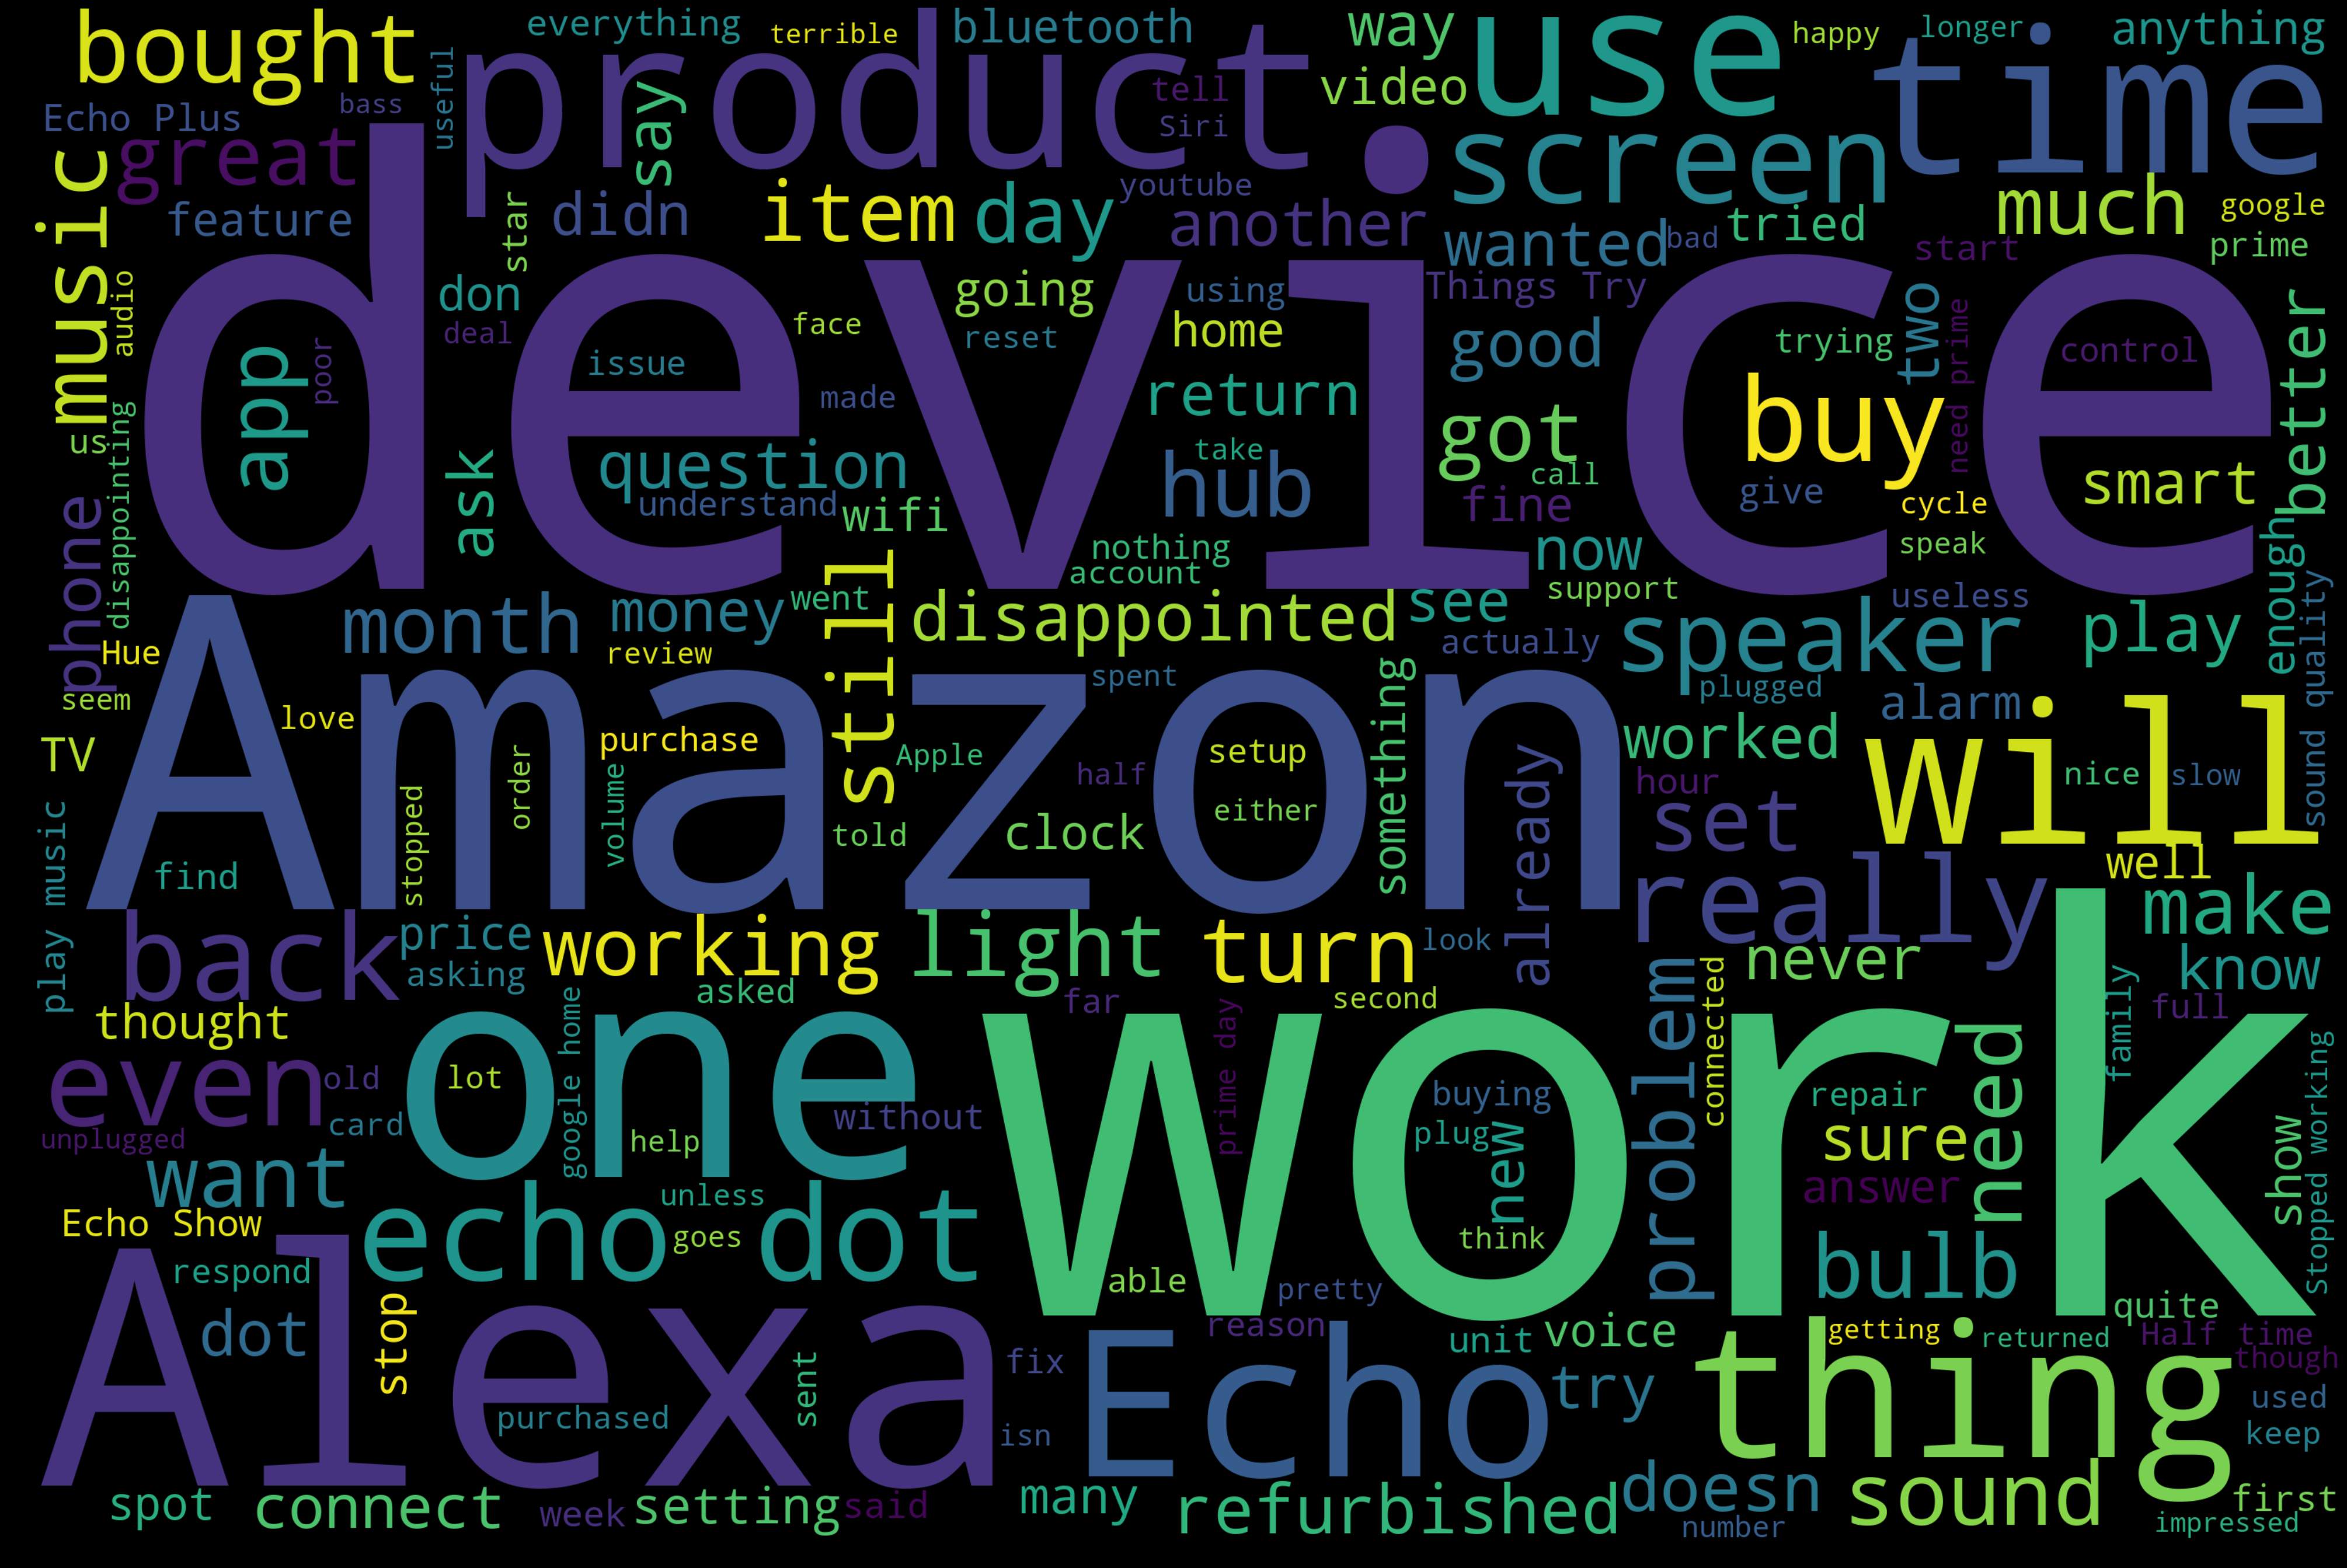

In [23]:
text = nf['verified_reviews'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

    Result: negative words like problem, disappointed, refurbished are used majorly in negative feedbacks

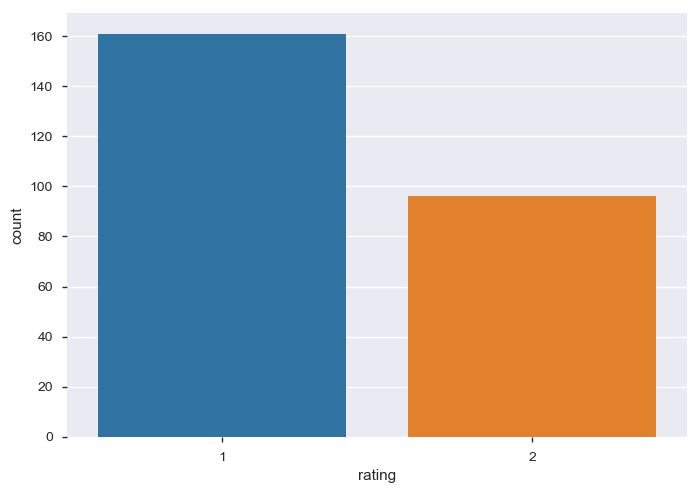

In [24]:
sns.countplot(x = 'rating', data = nf)    #all negative feedback are 1 and 2 ratings

# Sentiment Analysis

In [25]:
X = reviews.shape[0]
X

3150

In [26]:
import re
import nltk                                  # package for text processing
from nltk.corpus import stopwords            # for stopwords
from nltk.stem.porter import PorterStemmer   # change words to their baseform

In [27]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LuCky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
ps = PorterStemmer()
corpus = []

for i in range(0, X):
    review = re.sub('[^a-zA-Z]', ' ', reviews['verified_reviews'][i])      #removing special symbols from reviews
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review
              if not word in set(stopwords.words('english'))]              #reducing words in reviews to their base form
    review = " ".join(review)
    corpus.append(review)

In [29]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [30]:
#Applying Tf-Idf Vectorizer to evaluate how important a word is in a corpus

from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vectorizer = TfidfVectorizer(use_idf = True, strip_accents = "ascii")

In [32]:
y = reviews['feedback']
print (y)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3120    1
3121    1
3122    1
3123    1
3124    1
3125    1
3126    1
3127    1
3128    1
3129    1
3130    1
3131    1
3132    1
3133    1
3134    1
3135    1
3136    1
3137    1
3138    1
3139    1
3140    1
3141    1
3142    1
3143    1
3144    1
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64


In [33]:
x = vectorizer.fit_transform(corpus)
x.shape

(3150, 2765)

In [34]:
x

<3150x2765 sparse matrix of type '<class 'numpy.float64'>'
	with 35253 stored elements in Compressed Sparse Row format>

In [35]:
y.shape

(3150,)

In [36]:
#Train and Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, test_size= 0.2)

In [37]:
#Decision tree as classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight= 'balanced')

In [38]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
y_pred = dt.predict(x_test)

In [41]:
#Creating Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 42,  16],
       [ 51, 521]], dtype=int64)

In [44]:
#Generating classification report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.45      0.72      0.56        58
           1       0.97      0.91      0.94       572

    accuracy                           0.89       630
   macro avg       0.71      0.82      0.75       630
weighted avg       0.92      0.89      0.90       630



In [48]:
#Calculating Accuracy Score
acc = accuracy_score(y_test, y_pred)
acc

0.8936507936507937